PHASE 1 PROJECT



Problem statement
Entertainment industry is one of tge booming business area around the world. Factors contributing to this ivolves easy accesiblity odf content in this era whereby a good percentage has accessibilty of gadgets from PCs, amart phones  which is aas well complimented by steaming site such as neflif, showmax etc.  For an enterprenuer delving into film making,  they have strength in numbers if only they could pin point their how to poach their audince.  this can be easily informed what niche is popular, the costing  of production ofcourse to inform ROI,


Solution
This project aim to:
1.point out genres that are doing well in the filmaking industry to inform niche specification
2.Check ROI for specific Genres
2. 

SECTION 1; loading and undestanding databases

Loading and understsnding data
1. import packages
2. load data
3. Explore the data structure and its components

In [13]:
import pandas as pd
import os
import sqlite3
import numpy as np

loading and exploring tmdb data

1. TMDB DATASET
This data set contains  the tittle of the movies , the original titles, and of key a very important aspect, the popularity , vote average and vote count
There are no missing values in the data

In [30]:
tmdf = pd.read_csv("data/tmdb.movies.csv")
tmdf.info()
tmdf.isna(). sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [15]:
tmdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


2. BOM MOVIE_GROSS
This data set contain the title of the movie, sudio in which the movie was produced  as well the cost of production including year of production

In [16]:
bomdf = pd.read_csv("data/bom.movie_gross.csv")
bomdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
bomdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


3.tn.movies budget

In [18]:
budgetsfile = "data/tn.movie_budgets.csv"
budgetsdf = pd.read_csv(budgetsfile, delimiter=',')
budgetsdf .info()

budgetsdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [28]:
reviews_data = "data/rt.reviews.tsv"
reviewsdf = pd.read_csv(reviews_data, delimiter ='\t', encoding= 'ISO-8859-1')
reviewsdf.head()
reviewsdf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [27]:
rt_movies_info_file = "data/rt.movie_info.tsv"
rt_movies_info_df = pd.read_csv(rt_movies_info_file, delimiter ='\t',encoding= 'ISO-8859-1')
rt_movies_info_df .head()
rt_movies_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [31]:
rt_movies_info_df .head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


EPLORING IM DATABASE

1. loading and cleaning the IM database
in order to calculate get the rating per genre, we need to join the movie basics table and the movie ratings.


In [43]:
#loading the im database and identifying the available tables
conn = sqlite3.connect("data/im.db")
tables = pd.read_sql("""SELECT name FROM sqlite_master 
  WHERE type = 'table';""", conn)
tables

In [45]:
# joining the movie_basics and the movie-ratings tables as well dropiing the missing values
imdata = ("""SELECT * FROM movie_basics as b
        JOIN movie_ratings as  r
        ON b.movie_id = r.movie_id;""")
imdf=pd.read_sql(imdata, conn)
imdf.head()
imdf=imdf.drop("runtime_minutes", axis =1)
imdf=imdf.dropna()
imdf.isna().sum()
imdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73052 non-null  object 
 1   primary_title   73052 non-null  object 
 2   original_title  73052 non-null  object 
 3   start_year      73052 non-null  int64  
 4   genres          73052 non-null  object 
 5   movie_id        73052 non-null  object 
 6   averagerating   73052 non-null  float64
 7   numvotes        73052 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 5.0+ MB


MOST TRENDING GENRE


Checking the most trending, popular genre

usr_reviews = df.pivot(index='user_id', columns='business_id', values='stars')
usr_reviews.head()

In [67]:
genre_grouped = imdf.groupby('genres')["numvotes"].sum().sort_values(ascending=False)
TOP_20 = genre_grouped. head(30)
Most_voted = TOP_20.reset_index()


In [65]:
import matplotlib.pyplot as plt

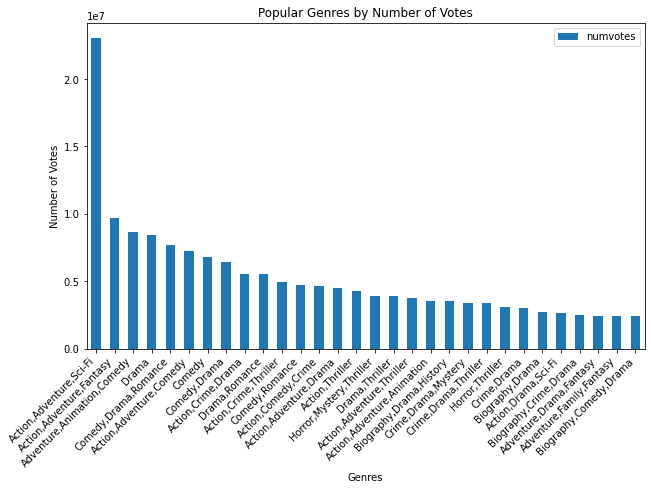

In [70]:
Most_voted.plot(kind='bar', x='genres', y='numvotes', figsize=(10, 6))
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('Popular Genres by Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.show();

Exploring tmdf data set to find out which is the most populat genre
1. Map genre ids to the genre names
2. use grouby and summation to get movies produced per genre
3. get the average ratings per genre( sum of ratings/ number of movies in the genre)